In [1]:
import pandas as pd

In [3]:
data = pd.read_csv('ecom_consumer_behaviour.csv')

In [4]:
data.head()

,department,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
0,16,6,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,-1.421844,-1.018221,-1.176914,0.484133
1,7,119,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,0.520861,-0.882609,-1.176914,0.961267
2,7,17,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,-0.923041,-0.746996,-1.176914,0.961267
3,19,53,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,0.310839,-0.611383,-1.176914,-0.947268
4,19,53,0.711081,-0.915226,-0.918583,-0.32586,1.057886,-0.375356,0.310839,-0.475770,-1.176914,-0.947268


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61033 entries, 0 to 61032
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   department              61033 non-null  int64  
 1   product_name            61033 non-null  int64  
 2   order_id                61033 non-null  float64
 3   user_id                 61033 non-null  float64
 4   order_number            61033 non-null  float64
 5   order_dow               61033 non-null  float64
 6   order_hour_of_day       61033 non-null  float64
 7   days_since_prior_order  61033 non-null  float64
 8   product_id              61033 non-null  float64
 9   add_to_cart_order       61033 non-null  float64
 10  reordered               61033 non-null  float64
 11  department_id           61033 non-null  float64
dtypes: float64(10), int64(2)
memory usage: 5.6 MB


In [6]:
data.describe()

,department,product_name,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,61033.000000,61033.000000,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04,6.103300e+04
mean,12.161339,68.329903,7.078302e-17,-3.120041e-17,-2.794066e-17,-1.303898e-17,-1.210762e-17,-5.494997e-17,-1.103656e-16,-7.148153e-17,-4.156174e-17,-1.024491e-16
std,6.474934,36.166283,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,0.000000,0.000000,-1.730260e+00,-1.742412e+00,-9.185832e-01,-1.276516e+00,-3.135676e+00,-1.290653e+00,-1.841888e+00,-1.018221e+00,-1.176914e+00,-1.424402e+00
25%,7.000000,49.000000,-8.606523e-01,-8.766198e-01,-6.894651e-01,-8.011880e-01,-8.059195e-01,-7.185921e-01,-1.054305e+00,-7.469959e-01,-1.176914e+00,-9.472684e-01
50%,11.000000,57.000000,-9.868699e-03,8.230696e-03,-3.457879e-01,-3.258599e-01,-1.069925e-01,-3.753557e-01,3.108389e-01,-3.401574e-01,8.496798e-01,-1.520452e-01
75%,19.000000,98.000000,8.720292e-01,8.724049e-01,3.415665e-01,1.100125e+00,5.919345e-01,4.255292e-01,9.409053e-01,4.735194e-01,8.496798e-01,9.612672e-01
max,20.000000,133.000000,1.713127e+00,1.731760e+00,4.752091e+00,1.575453e+00,2.222764e+00,2.141711e+00,1.649730e+00,1.145816e+01,8.496798e-01,1.756490e+00


In [7]:
# Check unique values and their counts in the 'reordered' column
data['reordered'].value_counts()

 0.849680    35444
-1.176914    25589
Name: reordered, dtype: int64

# DECISION TREE VS K-NN, SVM AND LOGISTIC REGRESSION

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Convert 'reordered' to binary
data['reordered'] = (data['reordered'] > 0).astype(int)

# Define features and target
X = data.drop('reordered', axis=1)
y = data['reordered']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Initialize the models
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
lr = LogisticRegression(random_state=42)

# Fit models
dt.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predictions
dt_pred = dt.predict(X_test)
knn_pred = knn.predict(X_test)
svm_pred = svm.predict(X_test)
lr_pred = lr.predict(X_test)

In [12]:
# Evaluate models and generate classification reports
dt_report = classification_report(y_test, dt_pred, output_dict=True)
knn_report = classification_report(y_test, knn_pred, output_dict=True)
svm_report = classification_report(y_test, svm_pred, output_dict=True)
lr_report = classification_report(y_test, lr_pred, output_dict=True)

# Confusion matrices
dt_cm = confusion_matrix(y_test, dt_pred)
knn_cm = confusion_matrix(y_test, knn_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

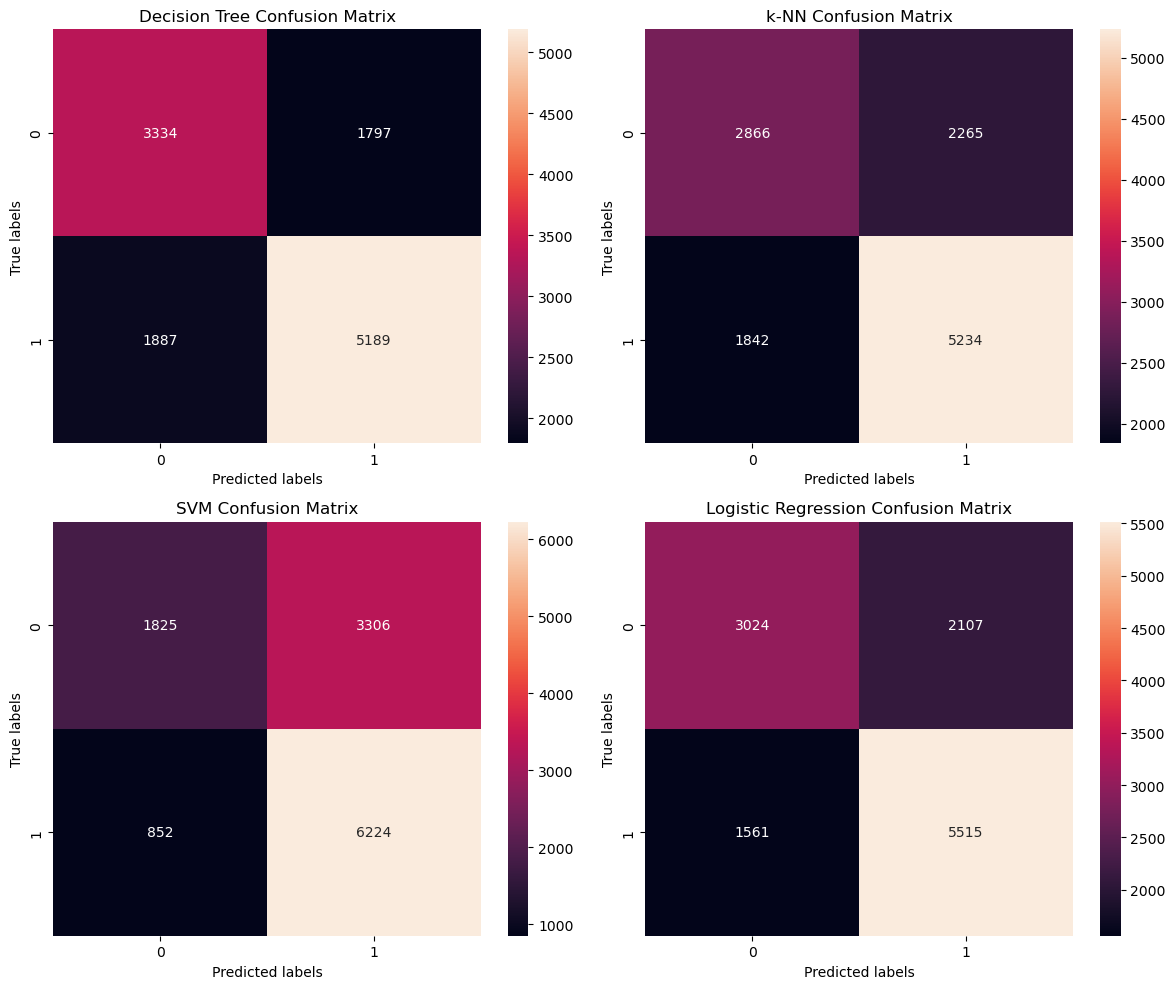

({'0': {'precision': 0.6385749856349359,
   'recall': 0.6497758721496785,
   'f1-score': 0.6441267387944359,
   'support': 5131},
  '1': {'precision': 0.7427712567993129,
   'recall': 0.7333239118145846,
   'f1-score': 0.7380173517280615,
   'support': 7076},
  'accuracy': 0.6982059474072254,
  'macro avg': {'precision': 0.6906731212171244,
   'recall': 0.6915498919821315,
   'f1-score': 0.6910720452612487,
   'support': 12207},
  'weighted avg': {'precision': 0.6989741676419099,
   'recall': 0.6982059474072254,
   'f1-score': 0.6985520666488092,
   'support': 12207}},
 {'0': {'precision': 0.6087510620220901,
   'recall': 0.5585655817579419,
   'f1-score': 0.5825795304400854,
   'support': 5131},
  '1': {'precision': 0.6979597279637285,
   'recall': 0.7396834369700396,
   'f1-score': 0.7182161234991424,
   'support': 7076},
  'accuracy': 0.6635536986974687,
  'macro avg': {'precision': 0.6533553949929093,
   'recall': 0.6491245093639908,
   'f1-score': 0.6503978269696139,
   'support':

In [13]:
# Visualization of confusion matrices
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.heatmap(dt_cm, annot=True, fmt='d', ax=ax[0, 0])
ax[0, 0].set_title('Decision Tree Confusion Matrix')
ax[0, 0].set_xlabel('Predicted labels')
ax[0, 0].set_ylabel('True labels')

sns.heatmap(knn_cm, annot=True, fmt='d', ax=ax[0, 1])
ax[0, 1].set_title('k-NN Confusion Matrix')
ax[0, 1].set_xlabel('Predicted labels')
ax[0, 1].set_ylabel('True labels')

sns.heatmap(svm_cm, annot=True, fmt='d', ax=ax[1, 0])
ax[1, 0].set_title('SVM Confusion Matrix')
ax[1, 0].set_xlabel('Predicted labels')
ax[1, 0].set_ylabel('True labels')

sns.heatmap(lr_cm, annot=True, fmt='d', ax=ax[1, 1])
ax[1, 1].set_title('Logistic Regression Confusion Matrix')
ax[1, 1].set_xlabel('Predicted labels')
ax[1, 1].set_ylabel('True labels')

plt.tight_layout()

(dt_report, knn_report, svm_report, lr_report, plt.show())

**Description of Dataset**

The e-commerce consumer behavior dataset serves as a rich repository of user interaction data with various products offered by an online retail service. This dataset, which includes 61,033 instances, offers a comprehensive view of consumer purchase patterns and product reorders.

Key Variables:
- Department: Categorical variable indicating the department to which a product belongs. Provides insights into department-wise sales and reorder tendencies.
- Product Name: Encodes the variety of products, allowing analysis of individual product performance.
- Order Details (Order ID, User ID, Order Number): These fields provide transactional data, enabling the tracking of orders across the consumer's purchasing timeline.
- Order Dow (Day of Week): Gives insights into the day-wise distribution of orders, which can be pivotal for planning weekly promotions.
- Order Hour of Day: Reflects the time at which orders are placed, useful for optimizing the timing of marketing campaigns.
- Days Since Prior Order: Indicates customer purchase frequency and can help identify loyal customers.
- Reordered: Binary target variable indicating whether a product was reordered. A critical variable for understanding customer retention and product lifecycle.

This dataset has undergone preprocessing during the 1st project to ensure standardization, enabling a fair comparison across various machine learning models.

**Objectives**

The aim of this analysis was to conduct a comparative study of four distinct machine learning models—Decision Tree, k-Nearest Neighbors (k-NN), Support Vector Machine (SVM), and Logistic Regression. The objective was to evaluate each model's predictive capability in determining the likelihood of a product being reordered. The evaluation metrics focused on were accuracy, precision, recall, and F1-score.

**Observations and Model Performance**

The performance of the four machine learning models was rigorously evaluated, each offering unique strengths and weaknesses:

- Decision Tree (DT)
The Decision Tree model demonstrated a commendable balance between precision and recall, suggesting that it was relatively consistent in its predictions for both classes. Specifically, it achieved a precision of 63.86% and a recall of 64.98% for the non-reordered products (Class 0) and a precision of 74.28% and a recall of 73.33% for the reordered products (Class 1). Its relatively high F1-scores imply that the model is quite balanced, but it is also the most prone to overfitting compared to the other models, which can lead to less generalized predictions.

- k-Nearest Neighbors (k-NN)
k-NN's performance was lower than the DT in terms of precision and recall across both classes. It had a precision of 60.88% for Class 0 and 69.80% for Class 1, alongside a recall of 55.86% for Class 0 and 73.97% for Class 1. The lower recall for Class 0 suggests that k-NN was more cautious in predicting non-reorders, which may be beneficial in scenarios where false positives are costlier than false negatives.

- Support Vector Machine (SVM)
SVM showed a significant disparity between the classes in terms of recall, with a very high recall of 87.96% for Class 1 but a much lower recall of 35.57% for Class 0. This indicates that SVM was highly effective in identifying reordered products but at the cost of incorrectly labeling non-reorders as reorders. The precision was relatively balanced between the two classes, which means that when SVM predicts an order to be a reorder, it is fairly reliable.

- Logistic Regression (LR)
LR offered the highest accuracy among all models at 69.95%. It also demonstrated the most balanced precision-recall trade-off, with precision and recall rates close to or exceeding 70% for both classes. This balance suggests that LR is a versatile model that does not heavily favor one class over another, making it a particularly good choice for scenarios where both types of errors (false positives and false negatives) have similar costs.

- Model Robustness
The robustness of a model in a dynamic e-commerce environment is vital. While DT offers a direct interpretability that could be valuable in understanding feature influence, its tendency to overfit can be problematic. k-NN's lower complexity might offer better generalization to new data compared to DT. SVM's high recall for Class 1 could be a double-edged sword, capturing most reorders but also increasing the risk of overestimating reorder inventory. LR's overall balanced performance presents it as a strong candidate for robust, long-term deployment.

- Predictive Power and Practical Implications
The practical implications of predictive power are paramount. A model like DT, which balances precision and recall, can be employed for targeted marketing strategies, identifying which products are likely to be repurchased. The predictive power of SVM in identifying reorders suggests its application in optimizing inventory levels for products with high turnover, reducing the likelihood of stockouts. Meanwhile, LR's balanced approach could be beneficial for developing comprehensive customer retention strategies, offering a holistic view of consumer behavior.

**Managerial Insights**

Given the results of the comparative analysis, several insights can be gleaned for potential application within a managerial context:

- Strategic Inventory Management
The Logistic Regression model's balanced recall and precision suggest it could be effectively used to predict reorder rates, informing inventory stocking and minimizing stockouts or overstocking.

- Marketing and Promotions
The timing variables (Order Dow and Order Hour of Day) potentially captured in the model can inform targeted marketing campaigns and promotional offers to boost sales during identified peak times.

- Customer Segmentation
Data pertaining to order frequency (Days Since Prior Order) can be used to segment customers into groups based on purchasing behavior, aiding in personalized marketing and loyalty programs.

- Product Lifecycle Strategies
Understanding reorder patterns through the models can assist in determining product lifecycle stages, helping managers decide when to introduce new products or phase out old ones.

- Hybrid Modeling Approach
Considering the strengths of both SVM and Logistic Regression, a hybrid or ensemble method combining both models could potentially offer a superior tool for predicting reorders, catering to the need for both high recall (ensuring low false negatives) and balanced accuracy.

- Feature Analysis
Further analysis of feature importance could help refine the data collection process, leading to more targeted data and potentially more accurate predictive models.

In conclusion, integrating the insights provided by the model analysis could drive data-driven decision-making, enhance operational efficiency, and ultimately contribute to a more engaging consumer experience. To fully leverage these insights, it is recommended that stakeholders align model selection with business goals, considering factors such as model interpretability, computational efficiency, and ease of integration into existing systems.